# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 644


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | agara
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | dembi dolo
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | kiiminki
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | howrah
Processing Record 9 of Set 1 | anloga
Processing Record 10 of Set 1 | cadale
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | nombre de dios
Processing Record 13 of Set 1 | ust'-barguzin
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | lodeve
Processing Record 17 of Set 1 | cill airne
Processing Record 18 of Set 1 | yuzhno-kurilsk
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | tsiombe
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set 1 | kapuskasing
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()



City          616
Lat           616
Lng           616
Max Temp      616
Humidity      616
Cloudiness    616
Wind Speed    616
Country       616
Date          616
dtype: int64

In [5]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,agara,42.0376,43.8238,18.83,91,7,2.05,GE,1692736094
1,tiksi,71.6872,128.8694,3.26,92,100,2.45,RU,1692736095
2,dembi dolo,8.5333,34.8000,13.98,92,99,2.46,ET,1692736095
3,edinburgh of the seven seas,-37.0676,-12.3116,13.49,88,100,9.50,SH,1692736095
4,pisco,-13.7000,-76.2167,20.03,77,100,3.09,PE,1692736095


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,agara,42.0376,43.8238,18.83,91,7,2.05,GE,1692736094
1,tiksi,71.6872,128.8694,3.26,92,100,2.45,RU,1692736095
2,dembi dolo,8.5333,34.8000,13.98,92,99,2.46,ET,1692736095
3,edinburgh of the seven seas,-37.0676,-12.3116,13.49,88,100,9.50,SH,1692736095
4,pisco,-13.7000,-76.2167,20.03,77,100,3.09,PE,1692736095


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

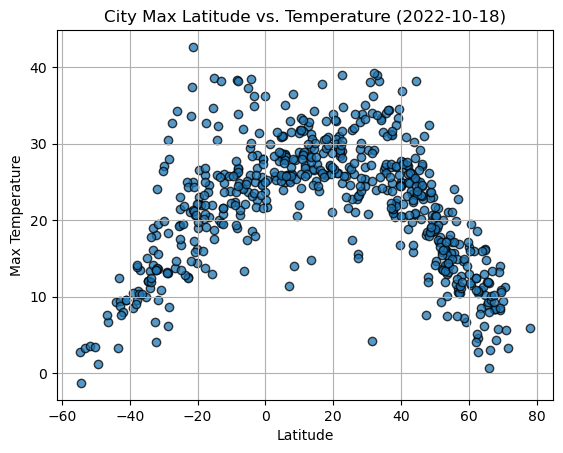

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Create a scatter plot for latitude vs max temperature.

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

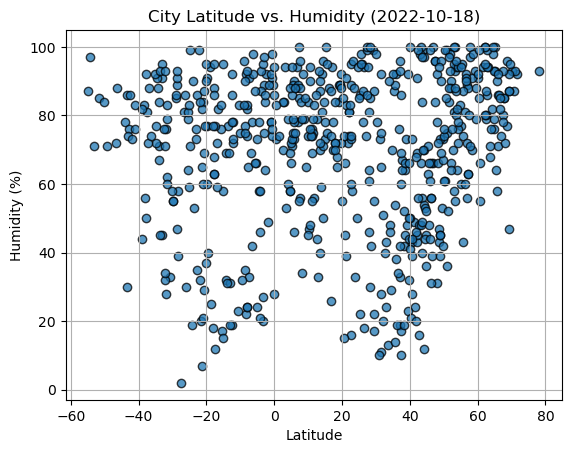

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

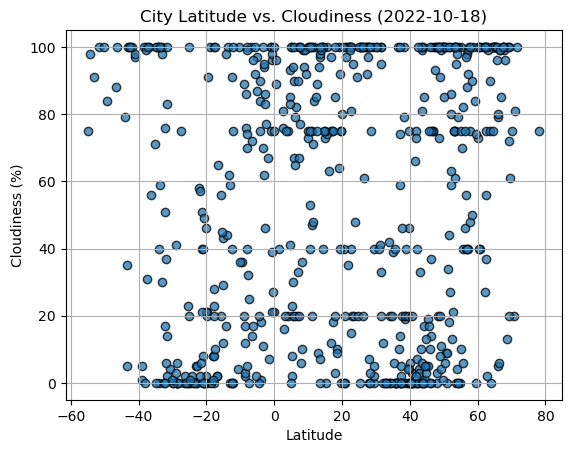

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

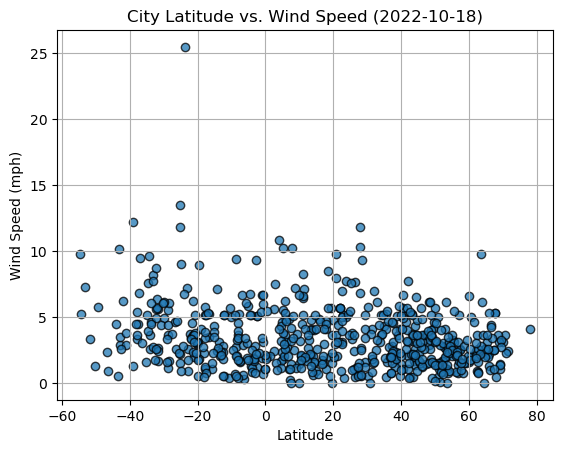

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, file_name):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    #plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.scatter(x_values, y_values, c='#4B9DDB', edgecolors="#4B9DDB")
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the equation of the line on the plot in the middle
    x_range = max(x_values) - min(x_values)
    y_range = max(y_values) - min(y_values)
    x_text = min(x_values) + x_range * 0.4
    y_text = min(y_values) + y_range * 0.1
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_text, y_text), fontsize=12, color="red", ha='right', va='bottom')
    
    # Add labels and title to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    r_text = f"r = {r_value:.2f}"
    
    print(r_text)
    # Save the figure
    plt.savefig(file_name)
    
    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,agara,42.0376,43.8238,18.83,91,7,2.05,GE,1692736094
1,tiksi,71.6872,128.8694,3.26,92,100,2.45,RU,1692736095
2,dembi dolo,8.5333,34.8000,13.98,92,99,2.46,ET,1692736095
5,kiiminki,65.1314,25.7974,14.81,100,100,2.15,FI,1692736095
7,howrah,22.5892,88.3103,29.00,89,40,3.09,IN,1692736096


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,13.49,88,100,9.50,SH,1692736095
4,pisco,-13.7000,-76.2167,20.03,77,100,3.09,PE,1692736095
6,ushuaia,-54.8000,-68.3000,2.81,87,75,9.77,AR,1692735889
10,adamstown,-25.0660,-130.1015,19.35,59,100,13.47,PN,1692736096
19,tsiombe,-25.3000,45.4833,21.40,79,0,2.22,MG,1692736098


###  Temperature vs. Latitude Linear Regression Plot

r = -0.72


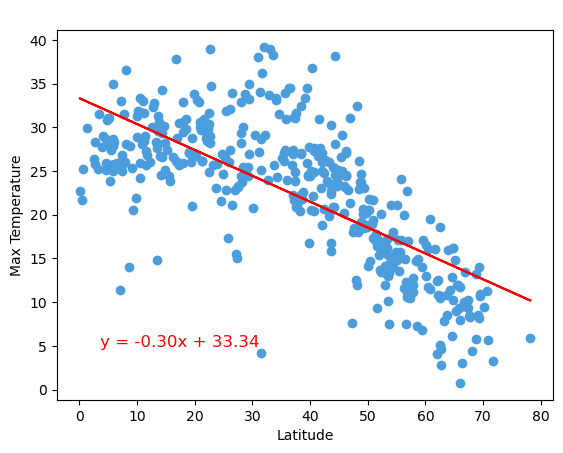

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature"," ", "../output_data/Northern_Hemi_Temp_vs_Latitude.png")


r = 0.73


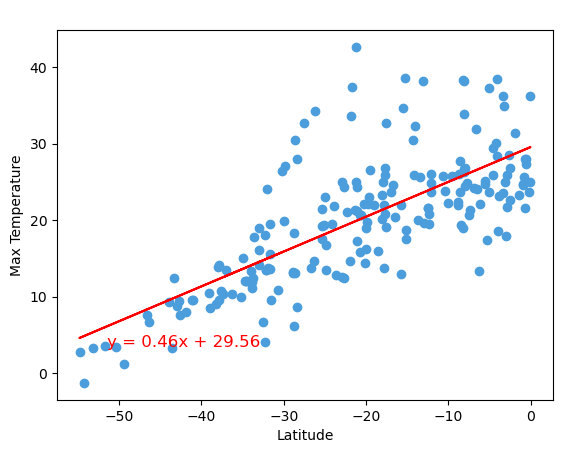

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature", " ", "../output_data/Southern_Hemi_Temp_vs_Latitude.png")


**Discussion about the linear relationship:** Firt figure is an inverse correlation between temperature and latitude. As we move towards higher latitudes the temperature tends to decrease. In the case of the Southern Hemisphere(figure 2), we can say that the correlation coefficient is high since it is close to 1, so it is a strong and positive correlation, which indicates that there is an increase in temperature the closer we get to the equator.

Those graphs are accurate to what we can expect in real life talking about difference of temperature between northern hemisphire and equator.

### Humidity vs. Latitude Linear Regression Plot

r = 0.10


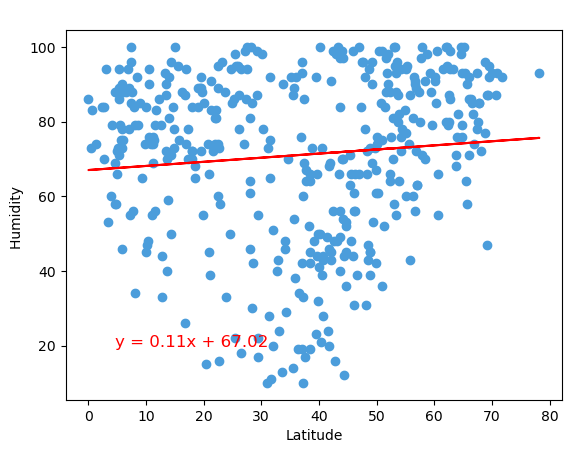

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity ", " ", "../output_data/Northern_Hemi_Humidity_vs_Latitude.png")


r = -0.07


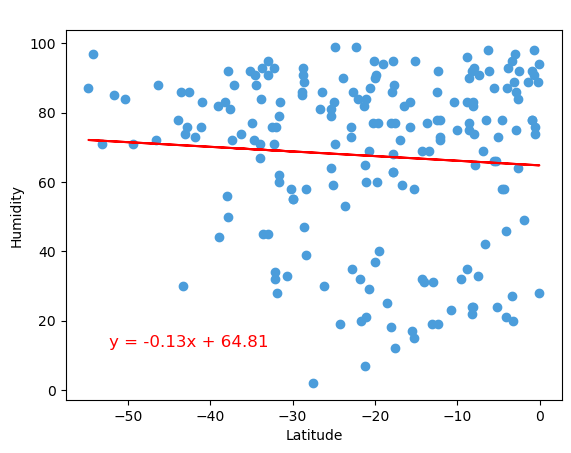

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", " ", "../output_data/Southern_Hemi_Humidity_vs_Latitude.png")


**Discussion about the linear relationship:** In both figures we can look at a slightly inverse correlation(close to -0.1) therefore there is no significant linear relationship between humidity and latitude in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

r = 0.03


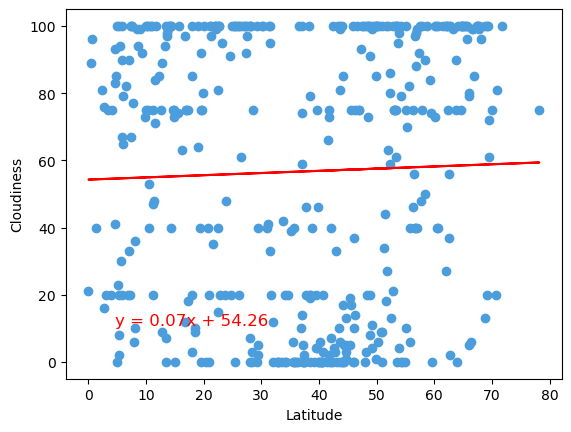

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "", "../output_data/Northern_Hemi_Cloudiness_vs_Latitude.png")


r = -0.04


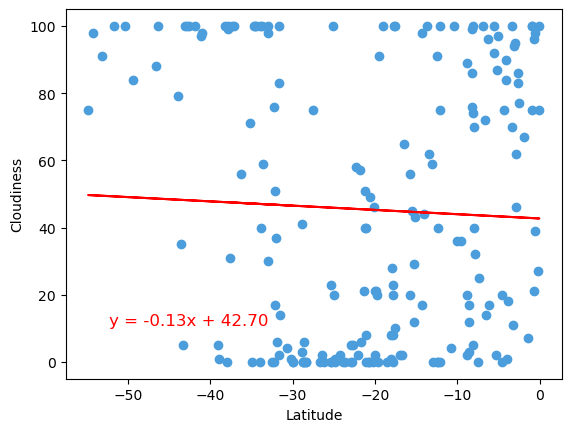

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "", "../output_data/Southern_Hemi_Cloudiness_vs_Latitude.png")


**Discussion about the linear relationship:** 
In the Northern Hemisphere, the correlation is zero, while in the Southern Hemisphere we can look at a weak inverse correlation. 
Since the absolute value of r is low (-0.04), the linear relationship is still weak and again is not a reliable method of predicting

### Wind Speed vs. Latitude Linear Regression Plot

r = -0.18


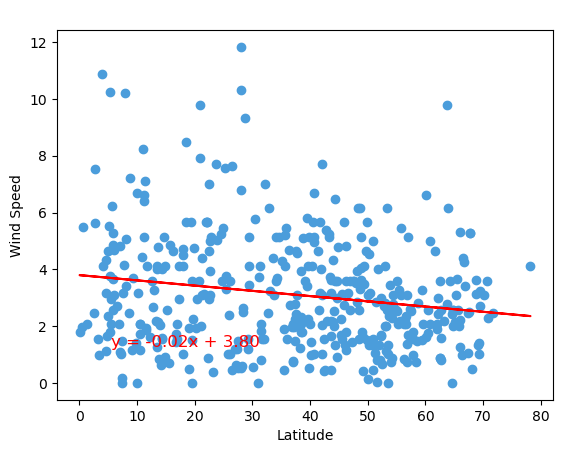

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", " ", "../output_data/Northern_Hemi_Wind_Speed_vs_Latitude.png")


r = -0.23


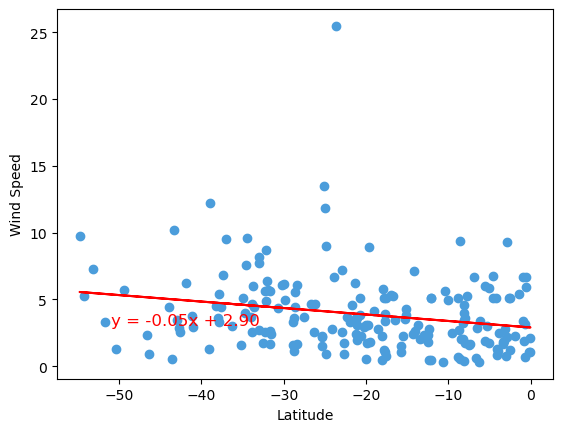

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "", "../output_data/Southern_Hemi_Wind_Speed_vs_Latitude.png")


**Discussion about the linear relationship:**  Both north and south diagrams are an inverse correlation.

We can assum that because as the latitude increases the wind speed tends to decrease in both cases, but the correlation is still very weak, therefore it is not strong enough to make accurate predictions based only on latitude.